<a href="https://colab.research.google.com/github/melanieyes/linear-regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
# dataset
data = genfromtxt('./advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

# Normalize input data by using mean normalizaton
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X-avg) / (maxi-mini)
  X_b = np.c_[np.ones((N, 1)), X]
  return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

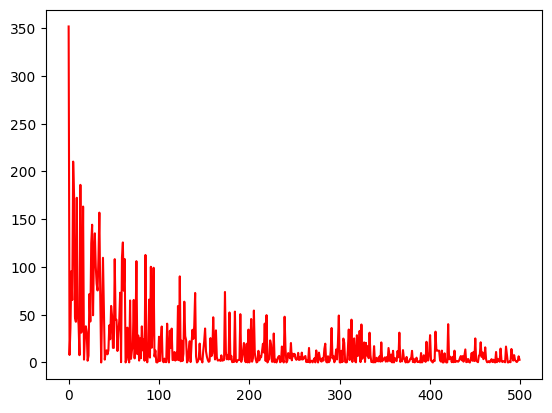

In [14]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):


    thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas] # convert to array
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):

            random_index = np.random.randint(N) # good for indexing
            # random_index = i # dump

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # output
            oi = xi.dot(thetas)

            # loss li
            li = (oi - yi)*(oi - yi) / 2

            # compute loss gradient
            g_li = (oi - yi)

            # gradient
            gradients = xi.T.dot(g_li)

            # updating theta
            thetas = thetas - learning_rate*gradients

            # logging
            thetas_path.append(thetas)
            losses.append(li[0][0])

    return thetas_path, losses

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01 )

# in loss for first 500 samples
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

In [4]:

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01 )
print(round(np.sum(losses),2))

6754.64


In [5]:
print(np.random.permutation(N).tolist())


[115, 181, 178, 14, 135, 98, 31, 199, 193, 144, 53, 105, 46, 38, 75, 55, 50, 91, 185, 180, 177, 192, 43, 163, 59, 106, 94, 7, 26, 194, 141, 63, 154, 149, 101, 42, 162, 196, 148, 110, 12, 9, 5, 143, 60, 168, 109, 6, 161, 90, 30, 88, 152, 79, 68, 73, 159, 72, 172, 140, 169, 113, 103, 197, 150, 35, 74, 134, 111, 124, 13, 64, 47, 29, 3, 84, 195, 128, 54, 77, 164, 95, 83, 175, 39, 107, 52, 0, 153, 96, 108, 136, 76, 191, 86, 19, 32, 132, 157, 62, 82, 170, 8, 122, 1, 121, 93, 18, 44, 40, 85, 66, 120, 117, 130, 56, 118, 119, 78, 100, 33, 49, 188, 92, 41, 139, 129, 127, 198, 160, 184, 65, 4, 16, 189, 87, 51, 173, 99, 167, 165, 17, 151, 25, 58, 183, 15, 22, 61, 70, 146, 81, 45, 156, 112, 57, 21, 2, 147, 34, 125, 187, 155, 11, 89, 166, 137, 28, 27, 104, 48, 102, 145, 186, 36, 37, 179, 182, 174, 10, 142, 114, 97, 176, 20, 67, 23, 171, 24, 71, 138, 126, 190, 116, 133, 158, 131, 69, 123, 80]


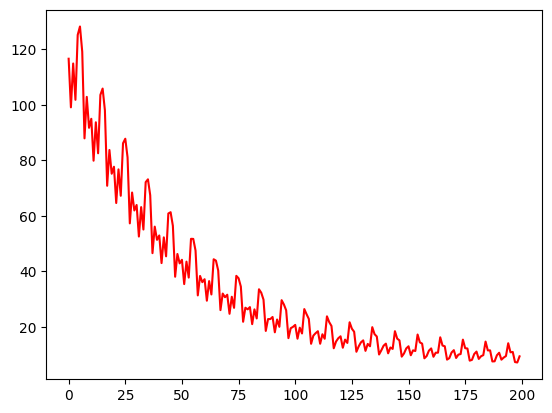

In [11]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01):

    thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(N) # uncomment this code for real application

        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])


        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            #  output
            output = xi.dot(thetas)

            # loss
            loss = ((output - yi)**2)/2

            # derive of loss
            loss_grd = (output - yi)/minibatch_size

            # deri of param
            gradients = xi.T.dot(loss_grd)

            # update
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

In [7]:
#question 13
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)
print(round(sum(losses),2))

8865.65


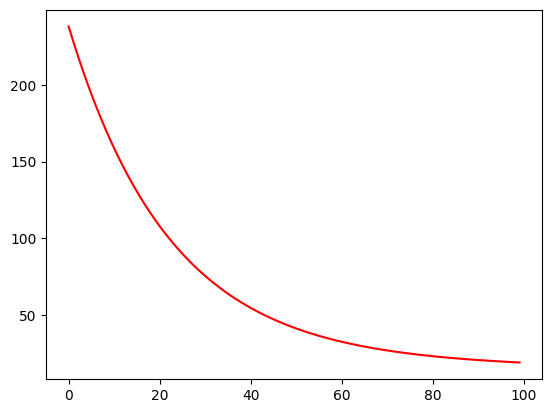

In [13]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):

        output = X_b.dot(thetas)

        # loss
        loss = (output - y)**2

        # derivative of loss
        loss_grd = 2*(output - y)/N

        # derivative for other params
        gradients = X_b.T.dot(loss_grd)

        # update
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)

    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

# in loss 100 sample
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

In [9]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses),2))

6716.46
